In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_flights = pd.read_csv(r"C:\Users\91894\Desktop\iNEURON Internship\flights_Dataset\flights.csv")

C:\Users\91894\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the datatypes of each column
df_flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [5]:
# Dropping unnecessary columns
df_flights = df_flights.drop(["DEPARTURE_TIME","SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL","ARRIVAL_TIME","TAIL_NUMBER",
                              "WHEELS_OFF","WHEELS_ON","TAXI_IN","TAXI_OUT","ELAPSED_TIME"],axis=1)

In [6]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

# Counting the missing values in each variable
df_flights.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Missing data')

Text(0.5, 1.0, 'Missing data')

Handling null values in the Delay features, i.e when there were no Airline, Security or Weather delays the value was left blank, now filling 0's as values will not bias the data.

In [8]:
df_flights['AIRLINE_DELAY'] = df_flights['AIRLINE_DELAY'].fillna(0)
df_flights['AIR_SYSTEM_DELAY'] = df_flights['AIR_SYSTEM_DELAY'].fillna(0)
df_flights['SECURITY_DELAY'] = df_flights['SECURITY_DELAY'].fillna(0)
df_flights['LATE_AIRCRAFT_DELAY'] = df_flights['LATE_AIRCRAFT_DELAY'].fillna(0)
df_flights['WEATHER_DELAY'] = df_flights['WEATHER_DELAY'].fillna(0)

Text(0.5, 1.0, 'Missing data')

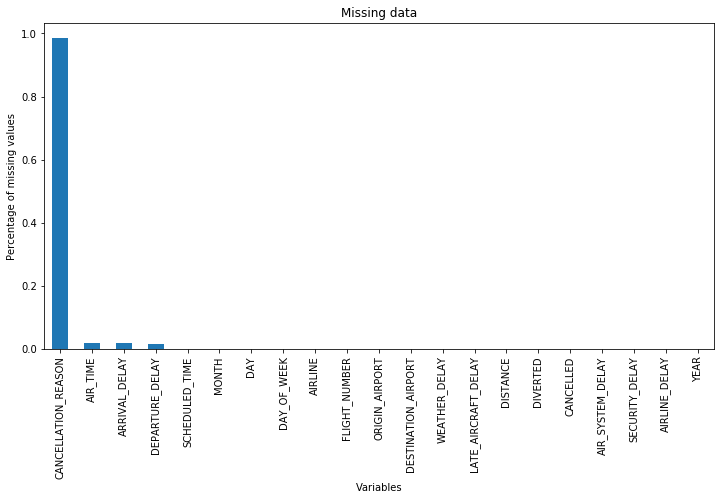

In [9]:
# Counting the missing values in each variable

df_flights.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Missing data')

Examinig the CANCELLATION_REASON column to fill the NaN with letter 'NC' for our understanding that there was No Cancellation

In [10]:
df_flights['CANCELLATION_REASON'].value_counts().sum()

89884

In [11]:
df_flights['CANCELLATION_REASON'].isnull().sum()

5729195

In [12]:
5729195-89884

5639311

Text(0.5, 1.0, 'Listing the Missing reasons')

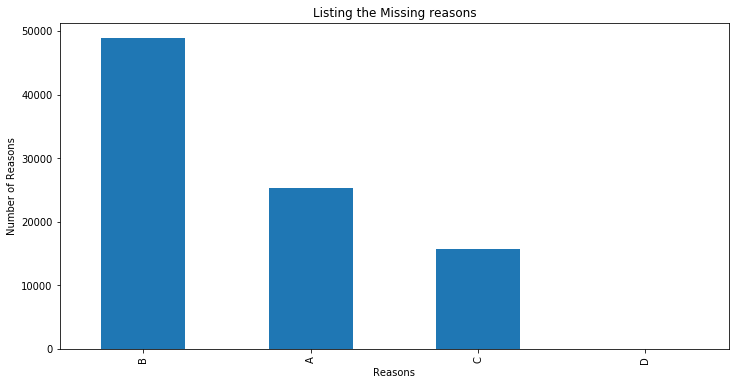

In [13]:
df_flights['CANCELLATION_REASON'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Number of Reasons')
plt.xlabel('Reasons')
plt.title('Listing the Missing reasons')

In [14]:
# Converting NaN labels to NC
df_flights['CANCELLATION_REASON'] = df_flights['CANCELLATION_REASON'].fillna('NC')

# Verifying the change
df_flights['CANCELLATION_REASON'].value_counts()

NC    5729195
B       48851
A       25262
C       15749
D          22
Name: CANCELLATION_REASON, dtype: int64

Text(0.5, 1.0, 'Missing data')

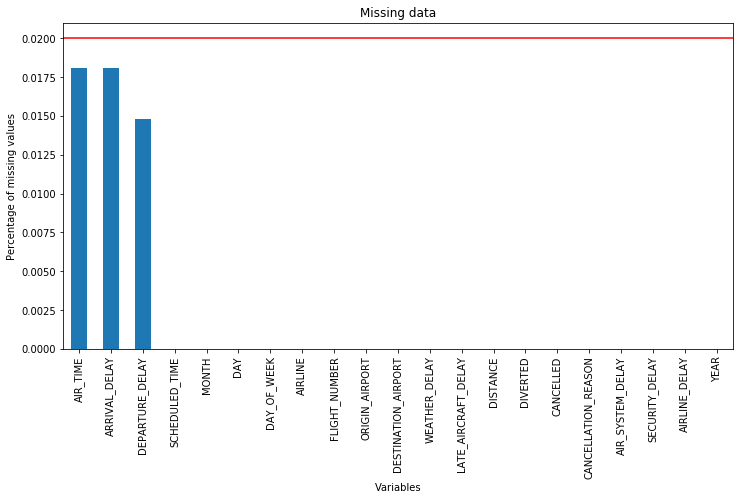

In [15]:
# Plotting the missing values in each variable
df_flights.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.axhline(y=0.02, color='red') # highlight the 2% mark with a red line:
plt.title('Missing data')

The reason for missing values in the above 3 features is due to the features DIVERTED or CANCELLED having value 1 (true), removing these null values of the 3 features will remove all the 1(true) records from DIVERTED or CANCELLED variables. We have to filter and ignore DIVERTED or CANCELLED flights while performing calculations on these columns. 

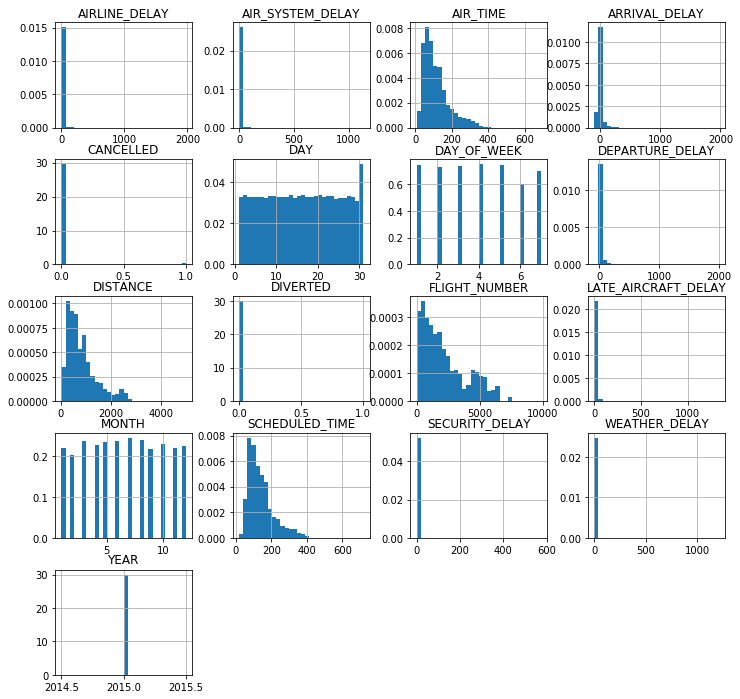

In [16]:
# Visualize the variable distribution with histograms

df_flights.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Most of the numerical variables in the dataset are skewed.

In [17]:
# Determine the number of unique categories in each feature:
df_flights.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
DEPARTURE_DELAY        1217
SCHEDULED_TIME          550
AIR_TIME                675
DISTANCE               1363
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       5
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

Creating a date column by combining the 'YEAR','MONTH', 'DAY' columns

In [18]:
df_flights['DATE'] = pd.to_datetime(df_flights[['YEAR','MONTH', 'DAY']])

In [19]:
df_flights["DATE"].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: DATE, dtype: datetime64[ns]

Loading the Airlines dataset and merging airline name with df_flights

In [20]:
df_airlines =pd.read_csv(r"C:\Users\91894\Desktop\iNEURON Internship\flights_Dataset\airlines.csv")
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [21]:
df_flights = df_flights.rename(columns={"AIRLINE":"IATA_CODE"})
df_merge = pd.merge(df_flights,df_airlines,on="IATA_CODE")
df_merge.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE
0,2015,1,1,4,AS,98,ANC,SEA,-11.0,205.0,...,0,0,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,SEA,ANC,-1.0,235.0,...,0,0,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,ANC,SEA,-4.0,204.0,...,0,0,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,ANC,PDX,-4.0,215.0,...,0,0,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,FAI,SEA,-8.0,213.0,...,0,0,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.


Loading the Airports dataset and merging on origin and destination airport to get city, origin and destination state details

In [22]:
df_airports = pd.read_csv(r"C:\Users\91894\Desktop\iNEURON Internship\flights_Dataset\airports.csv")
df_airports = df_airports.rename(columns={"IATA_CODE":"CODE"})
df_airports

,CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [23]:
# Merging the origin details
df = df_merge.merge(df_airports[['STATE','AIRPORT','CODE']], how = 'left',
                left_on = 'ORIGIN_AIRPORT', right_on = 'CODE').drop('CODE',axis=1)
df = df.rename(columns={"STATE":"ORIGIN_STATE","AIRPORT":"ORG_AIRPORT"})
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE,ORIGIN_STATE,ORG_AIRPORT
0,2015,1,1,4,AS,98,ANC,SEA,-11.0,205.0,...,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport
1,2015,1,1,4,AS,135,SEA,ANC,-1.0,235.0,...,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,WA,Seattle-Tacoma International Airport
2,2015,1,1,4,AS,108,ANC,SEA,-4.0,204.0,...,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport
3,2015,1,1,4,AS,122,ANC,PDX,-4.0,215.0,...,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport
4,2015,1,1,4,AS,130,FAI,SEA,-8.0,213.0,...,NC,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Fairbanks International Airport


In [24]:
# Merging the destination details
df = df.merge(df_airports[['STATE','AIRPORT','CODE']], how = 'left',
                left_on = 'DESTINATION_AIRPORT', right_on = 'CODE').drop('CODE',axis=1)
df = df.rename(columns={"STATE":"DESTINATION_STATE","AIRPORT":"DES_AIRPORT"})
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE,ORIGIN_STATE,ORG_AIRPORT,DESTINATION_STATE,DES_AIRPORT
0,2015,1,1,4,AS,98,ANC,SEA,-11.0,205.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,WA,Seattle-Tacoma International Airport
1,2015,1,1,4,AS,135,SEA,ANC,-1.0,235.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,WA,Seattle-Tacoma International Airport,AK,Ted Stevens Anchorage International Airport
2,2015,1,1,4,AS,108,ANC,SEA,-4.0,204.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,WA,Seattle-Tacoma International Airport
3,2015,1,1,4,AS,122,ANC,PDX,-4.0,215.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,OR,Portland International Airport
4,2015,1,1,4,AS,130,FAI,SEA,-8.0,213.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Fairbanks International Airport,WA,Seattle-Tacoma International Airport


In [30]:
df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE,ORIGIN_STATE,ORG_AIRPORT,DESTINATION_STATE,DES_AIRPORT
0,2015,1,1,4,AS,98,ANC,SEA,-11.0,205.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,WA,Seattle-Tacoma International Airport
1,2015,1,1,4,AS,135,SEA,ANC,-1.0,235.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,WA,Seattle-Tacoma International Airport,AK,Ted Stevens Anchorage International Airport
2,2015,1,1,4,AS,108,ANC,SEA,-4.0,204.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,WA,Seattle-Tacoma International Airport
3,2015,1,1,4,AS,122,ANC,PDX,-4.0,215.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,OR,Portland International Airport
4,2015,1,1,4,AS,130,FAI,SEA,-8.0,213.0,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Fairbanks International Airport,WA,Seattle-Tacoma International Airport


In [32]:
pd.set_option('display.max_columns', None)

In [35]:
df.dtypes

YEAR                            int64
MONTH                           int64
DAY                             int64
DAY_OF_WEEK                     int64
IATA_CODE                      object
FLIGHT_NUMBER                   int64
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
DEPARTURE_DELAY               float64
SCHEDULED_TIME                float64
AIR_TIME                      float64
DISTANCE                        int64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
CANCELLATION_REASON            object
AIR_SYSTEM_DELAY              float64
SECURITY_DELAY                float64
AIRLINE_DELAY                 float64
LATE_AIRCRAFT_DELAY           float64
WEATHER_DELAY                 float64
DATE                   datetime64[ns]
AIRLINE                        object
ORIGIN_STATE                   object
ORG_AIRPORT                    object
DESTINATION_STATE              object
DES_AIRPORT 